################################################################################
############################   Starting evolution    ###########################
################################################################################
                                                                                
                 ------------Evaluated 1000 items------------             


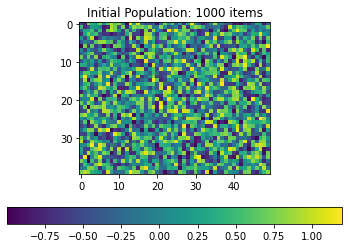

                                                                                                    
---------------------------   Population sample   ---------------------------
[-0.5064636822138882, -0.7830145929789032]
[0.737697997702079, 0.3992492693117484]
[0.32791315650017605, 0.7312659875943959]
[0.10758712820022143, 0.5963882048676643]
[0.93332769520811, 0.6231334623795706]
[0.8169249756506161, 0.08717694191480407]
[-0.9467073821589065, 1.1628231544355732]
[0.2921597701582226, 1.0444484237961502]
[-0.18014058064248029, -0.43304449367923437]
[-0.46919224407452287, -0.40481961928153143]
[-0.8920005977750687, -0.1986708579694303]
[0.7515297410361488, 0.1371535329737732]
[0.5855390858509975, -0.38905309134089294]
[0.21026228461199237, -0.646980874209679]
[0.32730315241666696, 1.11700315689722]
[0.0017522649739176721, -0.42767585797411]
[-0.8107317056808669, -0.5249772987634893]
[0.05130743506060953, 0.8955945618769259]
[-0.09775944481919874, 0.0060522266369416045]
[-0.3716247699484

                                                                                                    
Minimum in population: 17.54381800484927
Maximum in population (Fitness): 17.71828182756188
Average: 17.718
Std: 0.0058
                                                                                                    
                                                                                                    
-------------- Generation 20 -------------
---------Evaluated 593 individuals---------
                                                                                                    
Minimum in population: 17.660812770823227
Maximum in population (Fitness): 17.718281828226807
Average: 17.7182
Std: 0.0024
                                                                                                    
                                                                                                    
-------------- Generation 21 -------------
---------Evaluated 59

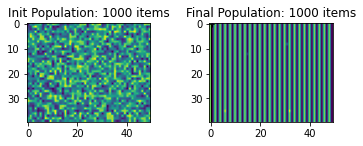

X-Max: 0.0
Y-Max: -1.571
Z-Max: 17.718


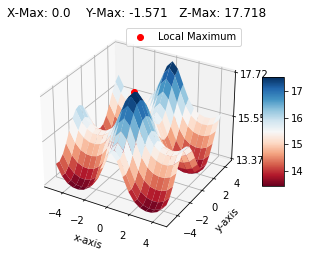

In [5]:
# -*- coding: cp1252 -*-

from deap import base,creator,algorithms,tools
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy import *
from matplotlib.pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show, xlabel, ylabel
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib

def graphics(z_func,best_ind):
   
    minimum_x = -5.0
    minimum_y = -5.0
    maximum_x = 5.0
    maximum_y = 5.0
   
    x1 = arange(minimum_x,maximum_x,0.5)
    y1 = arange(minimum_y,maximum_y,0.5)
    X,Y = meshgrid(x1, y1)                
    Z = z_func([X, Y])[0]

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                          cmap=cm.RdBu,linewidth=2, antialiased=True)

    ax.zaxis.set_major_locator(LinearLocator(3))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)
    x,y,z = best_ind[0], best_ind[1], z_func([best_ind[0], best_ind[1]])[0]

    print("X-Max: {0}\nY-Max: {1}\nZ-Max: {2}".format(round(best_ind[0],3),round(best_ind[1],3),round(z,3)))
    
    #plt.plot([x],[y],[z],'ro')                    
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    title("X-Max: {0}    Y-Max: {1}   Z-Max: {2}".format(round(x,3),round(y,3),round(z,3)))
    ax.plot(x, y, z, "ro", label="Local Maximum")
    plt.legend(loc="upper right")
    plt.show()
    
    
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) 
creator.create("Individual", list, fitness=creator.FitnessMax) 
toolbox = base.Toolbox()

def ind_population():
    ind = creator.Individual()
    ind.append(random.uniform(-1,1))
    ind.append(random.uniform(-0.8,1.2))
    return ind

toolbox.register("individual", ind_population) 
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def z_func(X):                        
        return 14 + np.exp(np.cos(X[0])) - np.sin(X[1]),

toolbox.register("evaluate", z_func)
toolbox.register("mate", tools.cxBlend, alpha=0.9)                              
toolbox.register("mutate", tools.mutGaussian,mu=0.3,sigma=0.1, indpb=0.01)  
toolbox.register("select", tools.selTournament, tournsize=3)  

def main():
    old_pop = toolbox.population(n=1000) 
    pop = toolbox.population(n=1000)     #Population: n = 1000 individuals
    CXPB, MUTPB, NGEN = 0.5, 0.2, 30     #Crossover, Mutation and number of generations
    print  ('################################################################################')
    print (u'############################   Starting evolution    ###########################')
    print  ('################################################################################')
    print  ('                                                                                ')
    #evaluate population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    
    print("                 ------------Evaluated %i items------------             " % len(pop))
    plt.title(u"Initial Population: {0} items".format(len(pop)))
    plt.imshow(np.asarray(pop).reshape(40,50))   
    
    plt.colorbar(orientation = 'horizontal')
    plt.show()
    print (' '*100)
    print (u'---------------------------   Population sample   ---------------------------')
    for i in range(20):
        print (pop[i])
    
    # Begin the evolution
    for g in range(NGEN):
        print (' '*100)
        print (' '*100)
        print(u"-------------- Generation %i -------------" % (g+1))
        
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
    
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        print("---------Evaluated %i individuals---------" % len(invalid_ind))
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        
        length = len(pop)
        mean = sum(fits) / length
        generator = (x*x for x in fits)
        sum2 = np.sum(np.fromiter(generator,dtype=float))
        std = abs(sum2 / length - mean**2)**0.5
        print (' '*100)
        print(u"Minimum in population: {0}\nMaximum in population (Fitness): {1}\nAverage: {2}\nStd: {3}".
              format(min(fits),max(fits),round(mean,4),round(std,4)))
    print (' '*100)
    print (' '*100)
    print(u"######################### End of evolution #########################")
    print (' '*100)
    print (' '*100)
    best_ind = tools.selBest(pop, 1)[0]
    print("Best solution: {0}\n\nFitness: {1}".format(best_ind, best_ind.fitness.values[0]))
    print (' '*100)
    print (' '*100)
    plt.subplot(2,2,1)
    plt.title(u"Init Population: {0} items".format(len(old_pop)))
    plt.imshow(np.asarray(old_pop).reshape(40,50))
    plt.subplot(2,2,2)
    plt.title(u"Final Population: {0} items".format(len(pop))) 
    print(' '*100)
    plt.hist(np.asarray(pop).reshape(20,100).flatten(), 500, range=(-1.4,1.2), fc='k', ec='k')
    plt.imshow(np.asarray(pop).reshape(40,50))
    plt.show()
    graphics(z_func,best_ind)
    
if __name__ == "__main__":
    main()